In [42]:
%reset
import os
from math import *
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from classifiers.pca import *
from classifiers.knn import *
from cifar_loading import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
root = 'orl_faces'
X, y = load_faces(root)

In [5]:
train_mask = [10*i + j for i in range(40) for j in range(7) ]
test_mask = [10*i + j for i in range(40) for j in range(7,10) ]
X_train = X[train_mask,:]
X_test = X[test_mask,:]
y_train = y[train_mask]
y_test = y[test_mask]

In [9]:
# pca
alpha = [0.8, 0.85, 0.9, 0.95]
U = []
pca = []
for x in range(0,len(alpha)):
    o = PCA()
    pca.append(o)
    U.append(pca[x].train(X_train, alpha=alpha[x], load_path='./pca_bonus_projection.npz', verbose=False))
    U[x] = np.real(U[x])

31
(10304,) (10304, 31)
44
(10304,) (10304, 44)
64
(10304,) (10304, 64)
95
(10304,) (10304, 95)


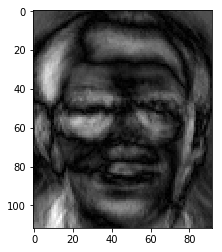

In [11]:
plt.imshow(U[0][:,6].reshape((112,92)),cmap='gray')

In [12]:
X_train_pca = []
for y in range(0,len(U)):
    X_train_pca.append(pca[y].project(X_train))
X_test_pca = []
for y in range(0,len(U)):
    X_test_pca.append(pca[y].project(X_test))  

In [13]:
for x in range(0,len(alpha)):
    knn_1 = K_nearest_neighbour()
    knn_1.train(X_train_pca[x], y_train)
    test_predictions = knn_1.predict(X_test_pca[x])
    train_predictions = knn_1.predict(X_train_pca[x])
    train_accuracy = np.mean(train_predictions == y_train)
    test_accuracy = np.mean(test_predictions == y_test)
    print(f'training accuracy {x} = {train_accuracy}')
    print(f'testing accuracy {x} = {test_accuracy}')

training accuracy 0 = 1.0
testing accuracy 0 = 0.8
training accuracy 1 = 1.0
testing accuracy 1 = 0.7833333333333333
training accuracy 2 = 1.0
testing accuracy 2 = 0.7916666666666666
training accuracy 3 = 1.0
testing accuracy 3 = 0.775


In [51]:
X_nf_train,Y_nf_train = load_CIFAR_batch('./non-faces/cifar-10-batches-py/data_batch_1')
print(X_nf_train.shape)

(10000, 32, 32, 3)


In [52]:
X_nf_train = np.apply_along_axis(weightedAverage, 3, X_nf_train)

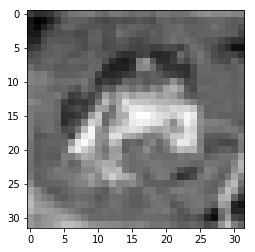

In [53]:
plt.gray()
plt.imshow(X_nf_train[0])

In [62]:
from skimage import data
from skimage.transform import resize
print(X_nf_train.shape)
def reshape_and_resize(img):
    img_32 = img.reshape((32,32))
    return resize(img_32, (112,92), mode='reflect')
P=X_nf_train.reshape((-1,32*32))
X_reshaped = np.apply_along_axis(reshape_and_resize, 1, P)
X_reshaped.shape

(10000, 32, 32)


(10000, 112, 92)

## Number of dominant eigenvectors in LDA
The number of dominant eigenvactors needed in the LDA is equal to the number of classes minus 1, in CIFAR-10 we have 10 classes so the dominant eigenvactors needed is 9